In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [4]:
HOUSING_PATH = '/Users/jihoon/Jupyter Notebook/HandsOn/datasets/housing/'

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()
# total_bedrooms에 결측값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


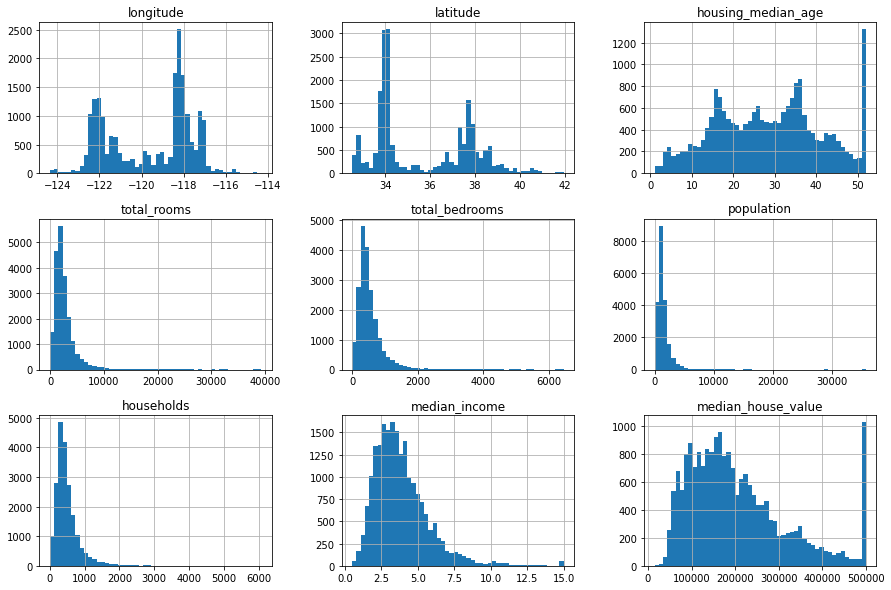

In [13]:
housing.hist(bins=50, figsize=(15, 10))
plt.show()
# housing_median_age, median_house_value는 cliping되었음

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set = train_test_split(housing, test_size=0.2)

In [16]:
len(train_set)

16512

<AxesSubplot:>

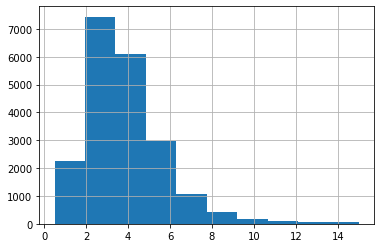

In [17]:
housing['median_income'].hist()

In [21]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
# 소득별로 구간을 나눔

In [19]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

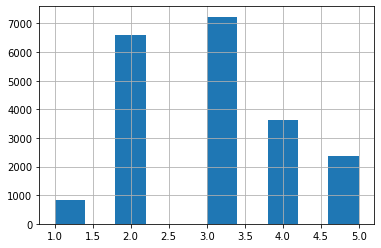

In [20]:
housing['income_cat'].hist()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [26]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)
# 비율이 유지되면서 split

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [25]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [32]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

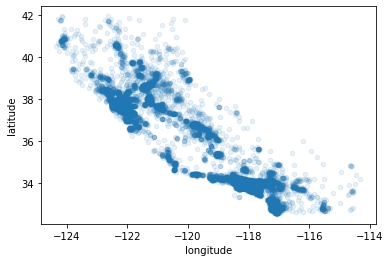

In [34]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

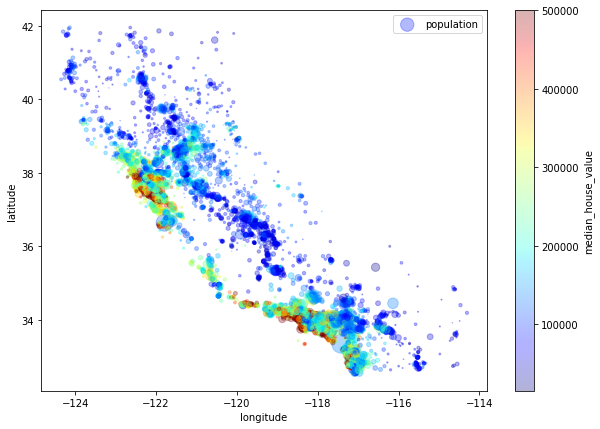

In [39]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
               s=housing['population']/100, label='population', figsize=(10, 7),
               c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
            sharex=False)
plt.legend()
# s: scatter point, c: colorbar name

In [41]:
import matplotlib.image as mpimg

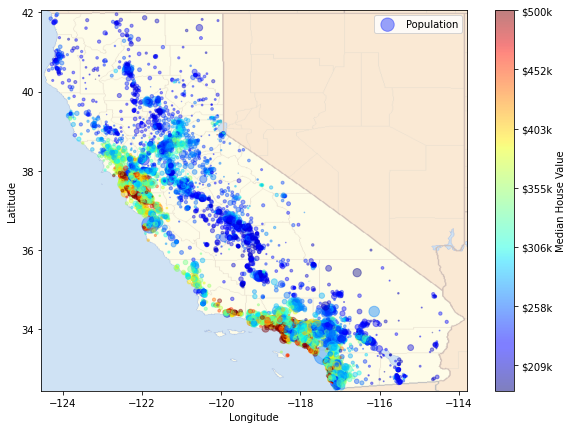

In [44]:
filename = 'california.png'
california_img = mpimg.imread(os.path.join(HOUSING_PATH, filename))
ax = housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7),
                 s=housing['population']/100, label='Population',
                 c='median_house_value', cmap=plt.get_cmap('jet'),
                 colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap('jet'))
plt.ylabel('Latitude')
plt.xlabel('Longitude')
prices = housing['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(['${}k'.format(round(v/1000)) for v in tick_values])
cbar.set_label('Median House Value')

plt.legend()
plt.show()

In [45]:
corr_matrix = housing.corr()

In [46]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685867
total_rooms           0.131394
housing_median_age    0.102365
households            0.066461
total_bedrooms        0.051260
population           -0.024889
longitude            -0.047516
latitude             -0.142268
Name: median_house_value, dtype: float64

In [47]:
from pandas.plotting import scatter_matrix

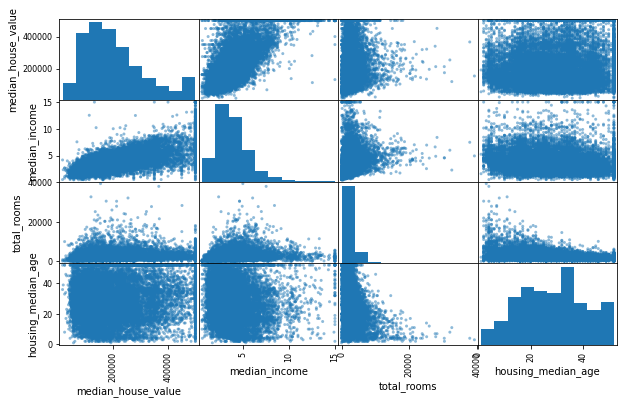

In [49]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10, 6))
plt.show()

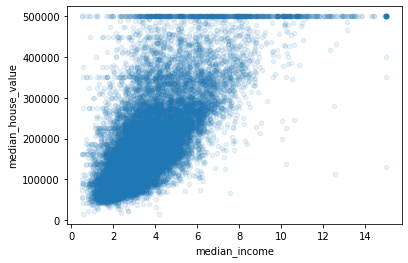

In [52]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1)
plt.show()
# median_house_value 상한선이 있음
# 그 이하에서도 수평선으로 분포된 가격이 있음

In [53]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [54]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685867
rooms_per_household         0.144970
total_rooms                 0.131394
housing_median_age          0.102365
households                  0.066461
total_bedrooms              0.051260
population_per_household   -0.020473
population                 -0.024889
longitude                  -0.047516
latitude                   -0.142268
bedrooms_per_room          -0.249999
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>

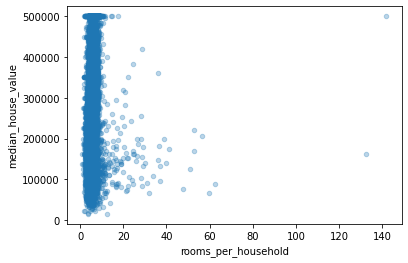

In [55]:
housing.plot(kind='scatter', x='rooms_per_household', y='median_house_value',
            alpha=0.3)

In [56]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16341.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16341.000000,16512.000000
mean,-119.559316,35.619103,28.655947,2643.267139,539.260266,1427.342478,500.923571,3.873178,206971.764777,5.429318,0.213029,3.066916
std,2.005103,2.135077,12.576983,2221.494996,429.054607,1155.269345,389.404408,1.905333,115418.628657,2.554293,0.058022,10.633302
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.790000,33.930000,18.000000,1443.000000,295.000000,784.000000,278.000000,2.562500,120000.000000,4.445434,0.175467,2.426460
50%,-118.480000,34.250000,29.000000,2124.000000,435.000000,1163.000000,409.000000,3.544300,179800.000000,5.231692,0.203216,2.813679
75%,-118.000000,37.710000,37.000000,3153.250000,648.000000,1726.250000,606.000000,4.737650,265200.000000,6.047666,0.240000,3.283439
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [57]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [58]:
from sklearn.impute import SimpleImputer

In [59]:
imputer = SimpleImputer(strategy='median')
# 수치형만 가능

In [60]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [61]:
imputer.statistics_

array([-118.48  ,   34.25  ,   29.    , 2124.    ,  435.    , 1163.    ,
        409.    ,    3.5443])

In [64]:
housing_num.median().values

array([-118.48  ,   34.25  ,   29.    , 2124.    ,  435.    , 1163.    ,
        409.    ,    3.5443])

In [65]:
X = imputer.transform(housing_num)

In [67]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20270,-119.18,34.19,5.0,384.0,131.0,410.0,149.0,1.5625
18407,-121.81,37.27,20.0,3244.0,520.0,1769.0,469.0,5.9214
553,-122.26,37.77,52.0,2097.0,444.0,915.0,413.0,2.9899
8653,-118.40,33.85,29.0,2085.0,533.0,919.0,489.0,5.6017
19630,-120.86,37.53,18.0,2829.0,732.0,1751.0,712.0,1.6445
...,...,...,...,...,...,...,...,...
5765,-118.30,34.17,17.0,4041.0,1169.0,3309.0,1117.0,2.6016
18011,-121.98,37.27,25.0,3075.0,564.0,1633.0,543.0,5.2528
483,-122.27,37.86,52.0,1769.0,372.0,849.0,365.0,2.6914
4795,-118.35,34.03,49.0,2334.0,530.0,1334.0,447.0,1.8900


In [69]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
20270,NEAR OCEAN
18407,<1H OCEAN
553,NEAR BAY
8653,<1H OCEAN
19630,INLAND


In [76]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [3.]])

In [72]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [73]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
# 메모리 절약을 위해 1의 위치를 저장하는 sparse matrix 반환

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [75]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [78]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

In [97]:
# rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

col_names = 'total_rooms', 'total_bedrooms', 'population', 'households'
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names
]

In [88]:
# BaseEstimator 상속: get_params(), set_params()
# TransformerMixin 상속: fit(), fit_transform(), transform()

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    # 추가할 요소 정의
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    # fit method는 기능이 없지만, fit/fit_transform 기능을 위해 입력
    def fit(self, X, y=None):
        return self
    # rooms_per_household, population_per_household 요소는 항상 추가하고,
    # add_bedrooms_per_room=True인 경우에 bedrooms_per_room도 추가
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [89]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.fit_transform(housing.to_numpy())

In [98]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+['rooms_per_household', 'population_per_household'],
    index=housing.index)
housing_extra_attribs.head()
# housing_extra_attribs는 numpy type이기 때문에 columns, index를 직접 설정해서 df로 바꿔야함

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
20270,-119.18,34.19,5.0,384.0,131.0,410.0,149.0,1.5625,NEAR OCEAN,2.577181,2.751678
18407,-121.81,37.27,20.0,3244.0,520.0,1769.0,469.0,5.9214,<1H OCEAN,6.916844,3.771855
553,-122.26,37.77,52.0,2097.0,444.0,915.0,413.0,2.9899,NEAR BAY,5.077482,2.215496
8653,-118.4,33.85,29.0,2085.0,533.0,919.0,489.0,5.6017,<1H OCEAN,4.263804,1.879346
19630,-120.86,37.53,18.0,2829.0,732.0,1751.0,712.0,1.6445,INLAND,3.973315,2.45927


In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [106]:
# 직접 전처리 파이프라인을 함수화 할 수 있음.
# 순서대로 fit_transform() method를 호출함
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # 결측값은 중앙값
    ('attribs_adder', CombinedAttributesAdder()), # 위에서 만든 FE
    ('std_scaler', StandardScaler()), # 정규화
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [102]:
housing_num_tr # 수치형 데이터 부분

array([[ 0.18918116, -0.66936536, -1.88094893, ..., -1.11663922,
        -0.02964724,  1.93222494],
       [-1.12251177,  0.77324949, -0.68825799, ...,  0.58238083,
         0.06629738, -0.80996947],
       [-1.34694592,  1.00744021,  1.85614936, ..., -0.13774737,
        -0.08007351, -0.03006813],
       ...,
       [-1.35193334,  1.04959454,  1.85614936, ..., -0.22814949,
        -0.06967839, -0.05194423],
       [ 0.60313748, -0.74430639,  1.61761117, ..., -0.08137206,
        -0.00776605,  0.20263465],
       [ 0.84253391, -0.93634279, -1.64241074, ...,  0.58284611,
        -0.09571503,  1.96946577]])

In [107]:
from sklearn.compose import ColumnTransformer
# 컬럼별로 transform

In [109]:
num_attribs = list(housing_num) # columns list
cat_attribs = ['ocean_proximity']

# 이름 / 함수 / 적용될 columns
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [110]:
housing_prepared

array([[ 0.18918116, -0.66936536, -1.88094893, ...,  0.        ,
         0.        ,  1.        ],
       [-1.12251177,  0.77324949, -0.68825799, ...,  0.        ,
         0.        ,  0.        ],
       [-1.34694592,  1.00744021,  1.85614936, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.35193334,  1.04959454,  1.85614936, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60313748, -0.74430639,  1.61761117, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.84253391, -0.93634279, -1.64241074, ...,  0.        ,
         0.        ,  0.        ]])

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [117]:
some_data_prepared = full_pipeline.transform(some_data)
print('Predict: ', lin_reg.predict(some_data_prepared))

Predict:  [139299.52125103 286984.64507717 230904.35249442 323326.53048895
  85839.45553197]


In [119]:
print('Labels: ', *some_labels)

Labels:  87500.0 224000.0 228100.0 430000.0 156900.0


In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68523.90794077006

In [122]:
mean_squared_error(housing_labels, housing_predictions, squared=False)

68523.90794077006

In [123]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20270,-119.18,34.19,5.0,384.0,131.0,410.0,149.0,1.5625,NEAR OCEAN
18407,-121.81,37.27,20.0,3244.0,520.0,1769.0,469.0,5.9214,<1H OCEAN
553,-122.26,37.77,52.0,2097.0,444.0,915.0,413.0,2.9899,NEAR BAY
8653,-118.40,33.85,29.0,2085.0,533.0,919.0,489.0,5.6017,<1H OCEAN
19630,-120.86,37.53,18.0,2829.0,732.0,1751.0,712.0,1.6445,INLAND


In [133]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(some_data_prepared, some_labels)

DecisionTreeRegressor()

In [134]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_mse

189563.90060359825

In [137]:
from sklearn.model_selection import cross_val_score
# 클수록 좋은 효용함수를 기대

In [138]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
# neg_mean_squared_error: 음수로 부호 바꿔서 계산
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([68832.31384208, 71220.37556455, 69487.85167831, 71291.84803611,
       67338.6388545 , 67054.02808674, 70225.60668701, 70073.77028572,
       70947.80877175, 66604.97059788])

In [140]:
def display_scores(scores):
    print('Score: ', scores)
    print('Mean: ', scores.mean())
    print('Std: ', scores.std())
    
display_scores(tree_rmse_scores)

Score:  [68832.31384208 71220.37556455 69487.85167831 71291.84803611
 67338.6388545  67054.02808674 70225.60668701 70073.77028572
 70947.80877175 66604.97059788]
Mean:  69307.72124046463
Std:  1680.2968822961238


In [141]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Score:  [77181.73825934 66080.5596409  65370.43943533 70591.8912248
 66272.61781288 69810.36851728 68799.24441042 68673.95211293
 69059.57833131 67535.99141776]
Mean:  68937.63811629632
Std:  3186.2470390681506


In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [144]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18493.36770492417

In [145]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Score:  [51550.16622703 49250.21437038 47546.00193314 51336.37824718
 49151.31835798 48361.56210511 51424.17787498 50527.40763312
 50212.33722314 48289.79205207]
Mean:  49764.93560241244
Std:  1374.8357524030444


In [146]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68937.638116
std       3358.599277
min      65370.439435
25%      66588.461214
50%      68736.598262
75%      69622.670971
max      77181.738259
dtype: float64

In [147]:
from sklearn.svm import SVR

In [148]:
svm_reg = SVR(kernel='linear')
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
svm_rmse

110811.35164919349

In [149]:
from sklearn.model_selection import GridSearchCV

In [151]:
param_grid = [
    # 3 * 4 = 12가지
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # 1 * 2 * 3 = 6가지
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
# (12+6) * 5(cv) = 90
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [152]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [154]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [155]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63991.07649416826 {'max_features': 2, 'n_estimators': 3}
54752.61854886701 {'max_features': 2, 'n_estimators': 10}
52531.8038327187 {'max_features': 2, 'n_estimators': 30}
60618.680041612075 {'max_features': 4, 'n_estimators': 3}
52711.119724025084 {'max_features': 4, 'n_estimators': 10}
50064.409634362506 {'max_features': 4, 'n_estimators': 30}
58589.062129990045 {'max_features': 6, 'n_estimators': 3}
51773.38019315045 {'max_features': 6, 'n_estimators': 10}
49634.312396336456 {'max_features': 6, 'n_estimators': 30}
58271.8787102208 {'max_features': 8, 'n_estimators': 3}
52383.98445686514 {'max_features': 8, 'n_estimators': 10}
49781.216695015944 {'max_features': 8, 'n_estimators': 30}
62351.344662267285 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54270.26354753523 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59475.896184635174 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52077.486138583954 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [227]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
# 입력했던 columns 순서대로

array([7.87588412e-02, 7.18635326e-02, 4.21986915e-02, 1.73944520e-02,
       1.59765531e-02, 1.74690507e-02, 1.53402273e-02, 3.16993221e-01,
       6.62135358e-02, 1.05673714e-01, 6.90199061e-02, 8.23864720e-03,
       1.68051915e-01, 1.74388868e-04, 2.21809386e-03, 4.41523096e-03])

In [228]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
# 앞에서 만들었던 파이프라인 안에서 'cat'만 가져옴
cat_encoder = full_pipeline.named_transformers_['cat']

cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3169932206486665, 'median_income'),
 (0.16805191451709967, 'INLAND'),
 (0.10567371377493559, 'pop_per_hhold'),
 (0.07875884116038588, 'longitude'),
 (0.07186353256521537, 'latitude'),
 (0.0690199061122508, 'bedrooms_per_room'),
 (0.0662135357694327, 'rooms_per_hhold'),
 (0.042198691464136705, 'housing_median_age'),
 (0.017469050725129814, 'population'),
 (0.017394451974431877, 'total_rooms'),
 (0.01597655311885403, 'total_bedrooms'),
 (0.015340227280630512, 'households'),
 (0.008238647197990435, '<1H OCEAN'),
 (0.0044152309643487354, 'NEAR OCEAN'),
 (0.0022180938585542047, 'NEAR BAY'),
 (0.0001743888679371977, 'ISLAND')]

In [174]:
housing_prepared.shape
# input data의 features 16개의 중요도

(16512, 16)

In [175]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

49707.94222427958

In [176]:
from scipy import stats

In [181]:
len(squared_errors)

4128

In [190]:
confidence = 0.95
squared_errors = (final_predictions - y_test)**2

# confidence 범위에서 ddof=1, 평균/표준오차(stats.sem)로 계산
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([47429.88833294, 51886.0745583 ])

In [192]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('linear', LinearRegression()),
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

# 이런식으로 마지막에는 파이프라인 함수 하나로 처음부터 끝까지 돌릴 수 있게 만들어야 함

array([139299.52125103, 286984.64507717, 230904.35249442, 323326.53048895,
        85839.45553197])

In [193]:
my_model = full_pipeline_with_predictor

In [194]:
import joblib

In [195]:
joblib.dump(my_model, 'my_model.pkl') # 모델 저장
my_model_loaded = joblib.load('my_model.pkl') # load

In [196]:
from scipy.stats import geom, expon

In [205]:
geom_distrib = geom(0.5).rvs(10000) # 랜덤기하분포
expon_distrib = expon(scale=1).rvs(10000) # 랜덤지수분포

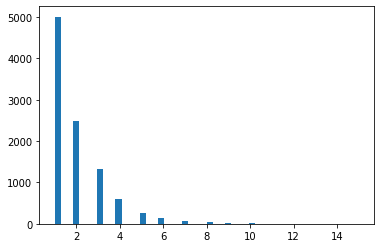

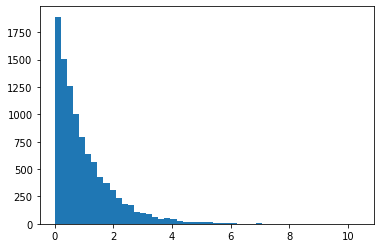

In [207]:
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

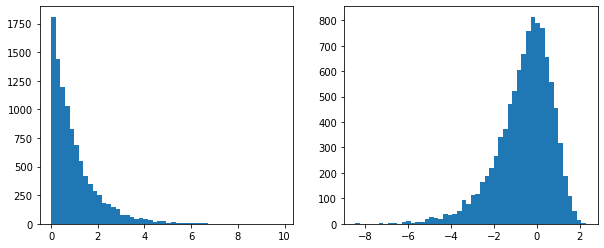

In [208]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.hist(samples, bins=50)
plt.subplot(122)
plt.hist(np.log(samples), bins=50)

plt.show()

In [209]:
from sklearn.base import BaseEstimator, TransformerMixin

In [220]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

# np.partition(list(arr), k) => list중에서 k개의 작은값을 왼쪽에 둠(순서는 고려 안함)
# np.argpartition => index 반환

In [226]:
# 중요도가 높은 k개의 특성 추출하는 함수

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [222]:
k = 5

top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [224]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [225]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3169932206486665, 'median_income'),
 (0.16805191451709967, 'INLAND'),
 (0.10567371377493559, 'pop_per_hhold'),
 (0.07875884116038588, 'longitude'),
 (0.07186353256521537, 'latitude')]

In [229]:


preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline), # 앞에서 만들었던 전처리 파이프라인
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [230]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [234]:
housing_prepared_top_k_features[:3]
# 중요도가 높은 다섯개 features(k=5)만 남기는 pipeline

array([[ 0.18918116, -0.66936536, -1.21277893, -0.02964724,  0.        ],
       [-1.12251177,  0.77324949,  1.07502645,  0.06629738,  0.        ],
       [-1.34694592,  1.00744021, -0.46359602, -0.08007351,  0.        ]])

In [235]:
housing_prepared[:3, top_k_feature_indices]

array([[ 0.18918116, -0.66936536, -1.21277893, -0.02964724,  0.        ],
       [-1.12251177,  0.77324949,  1.07502645,  0.06629738,  0.        ],
       [-1.34694592,  1.00744021, -0.46359602, -0.08007351,  0.        ]])

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_)),
])